#Clasificación

Este notebook es para ejemplificar la teoría de clasificación.

Vamos a utilizar el dataset de `Diabetes` que viene en este [link](https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv) de todas formas en la pestaña de abajo se hace un método get para obtener el csv desde dicho link 👇

## 1. Cargamos el dataset

In [1]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2023-09-23 17:37:07--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2023-09-23 17:37:07 (112 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## 2. Analizamos dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


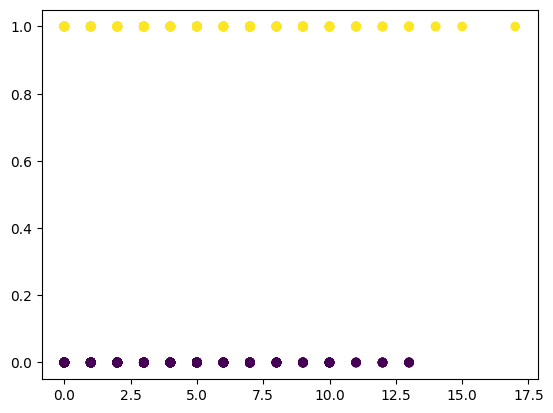

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['Pregnancies'],data['Outcome'],c=data['Outcome']);

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
X = data.drop(columns='Outcome')
y = data['Outcome']

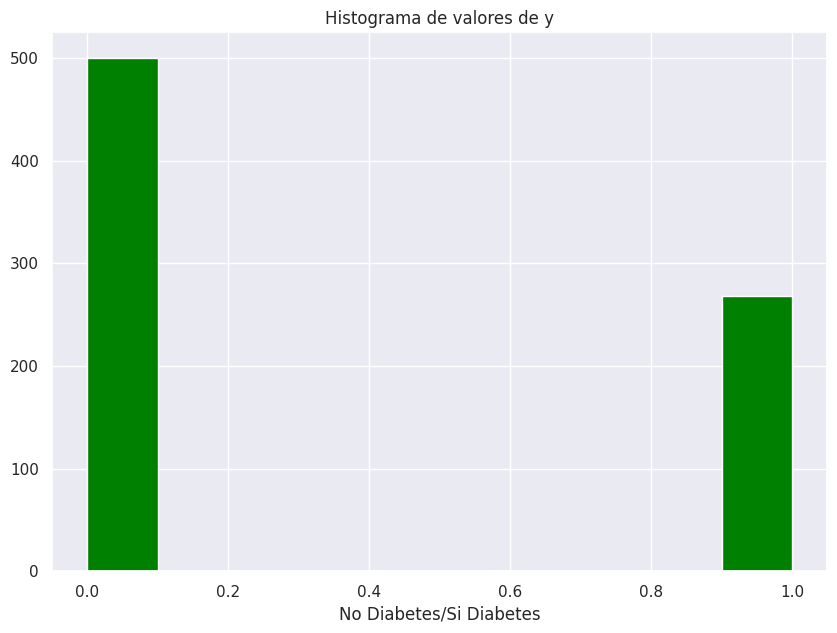

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(y,color='green')
plt.xlabel("No Diabetes/Si Diabetes")
plt.title("Histograma de valores de y");

## 3. Separamos los datos

In [ ]:
#Separamos los datos de forma estratificada para mantener la proporcion de distribución de Y
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, stratrify=y, test_size=0.25)
print(f"Set de entrenamiento {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo {Xtest.shape}, {ytest.shape}")

TypeError: ignored

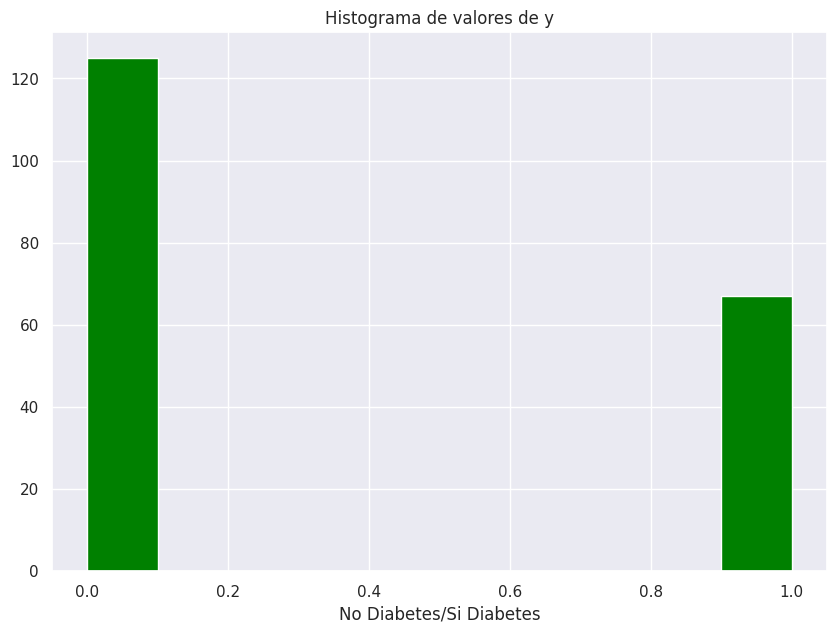

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(ytest,color='green')
plt.xlabel("No Diabetes/Si Diabetes")
plt.title("Histograma de valores de y");

## 4. Entrenamos el modelo de Regresión Logística

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logreg = make_pipeline(StandardScaler(),LogisticRegression())
model_logreg.fit(Xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## 5. Evaluamos el modelo de regresión logistica

In [ ]:
model_logreg.predict_proba(Xtest)

array([[0.30355788, 0.69644212],
       [0.08181364, 0.91818636],
       [0.94391731, 0.05608269],
       [0.79677907, 0.20322093],
       [0.29858788, 0.70141212],
       [0.17567287, 0.82432713],
       [0.50732913, 0.49267087],
       [0.90176549, 0.09823451],
       [0.64493283, 0.35506717],
       [0.23132962, 0.76867038],
       [0.64693634, 0.35306366],
       [0.83278631, 0.16721369],
       [0.21511388, 0.78488612],
       [0.95123978, 0.04876022],
       [0.18113194, 0.81886806],
       [0.93377948, 0.06622052],
       [0.43022499, 0.56977501],
       [0.70336695, 0.29663305],
       [0.5994571 , 0.4005429 ],
       [0.39548195, 0.60451805],
       [0.04974211, 0.95025789],
       [0.70847456, 0.29152544],
       [0.92692654, 0.07307346],
       [0.61721355, 0.38278645],
       [0.1756466 , 0.8243534 ],
       [0.88401012, 0.11598988],
       [0.56733866, 0.43266134],
       [0.09116614, 0.90883386],
       [0.38056842, 0.61943158],
       [0.81263726, 0.18736274],
       [0.

In [ ]:
model_logreg.predict(Xtest)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
print(f"R2 en entrenamiento: {model_logreg.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_logreg.score(Xtest,ytest)}")

R2 en entrenamiento: 0.7829861111111112
R2 en testeo: 0.75


In [ ]:
from sklearn import metrics as ms

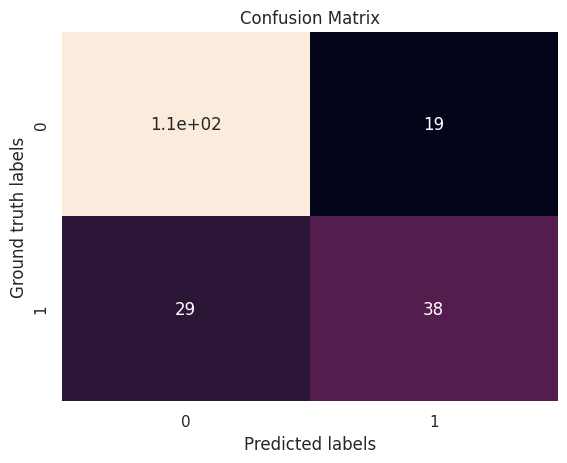

In [ ]:
y_pred_logreg = model_logreg.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_logreg)
sns.heatmap(confusion_matrix,annot=True,cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [ ]:
# Calculamos las metricas más usuales para controlar la performance del modelo
# Estas metricas son: Accuracy, Precision, Recall, F1-score
# Las almacenamos en un diccionario

acc_logreg = ms.accuracy_score(y_true = ytest, y_pred = y_pred_logreg)
precision_logreg = ms.precision_score(y_true = ytest, y_pred = y_pred_logreg)
recall_logreg = ms.recall_score(y_true = ytest, y_pred = y_pred_logreg)
f1_logreg = ms.f1_score(y_true = ytest, y_pred = y_pred_logreg)

logreg_metrics = {"Accuracy":acc_logreg,
                  "Precision":precision_logreg,
                  "Recall":recall_logreg,
                  "F1":f1_logreg}
logreg_metrics


{'Accuracy': 0.75,
 'Precision': 0.6666666666666666,
 'Recall': 0.5671641791044776,
 'F1': 0.6129032258064515}

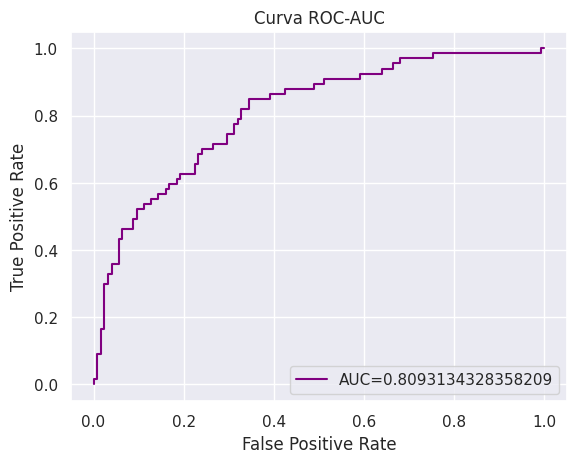

In [ ]:
from matplotlib.font_manager import MSFontDirectories
# Ahora ploteamos la curva ROC (Receiver Operating Characteristic)
y_pred_proba = model_logreg.predict_proba(Xtest)[::,1]
fpr, tpr, _ = ms.roc_curve(ytest,  y_pred_proba)
auc = ms.roc_auc_score(ytest, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,c='purple',label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("Curva ROC-AUC");

> **Nota:** para más información de la curva ROC-AUC ir a este [link](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

## 6. Entrenamos modelo de Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB,CategoricalNB
from sklearn.preprocessing import MinMaxScaler
model_naive = make_pipeline(MinMaxScaler(),MultinomialNB())
model_naive.fit(Xtrain,ytrain)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

## 7. Evaluamos el modelo de Naive Bayes

In [ ]:
print(f"R2 en entrenamiento: {model_naive.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_naive.score(Xtest,ytest)}")

R2 en entrenamiento: 0.6510416666666666
R2 en testeo: 0.6510416666666666


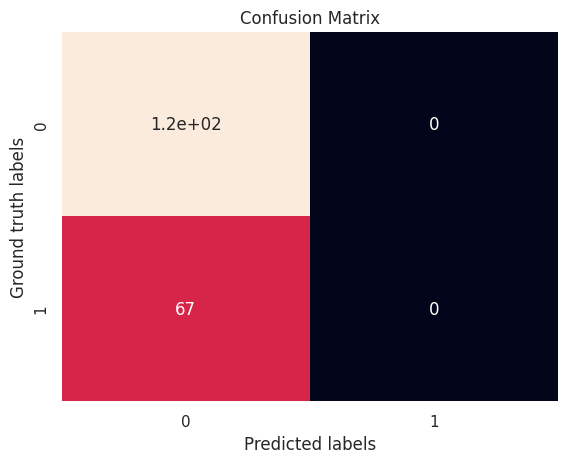

In [ ]:
y_pred_naive = model_naive.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_naive)
sns.heatmap(confusion_matrix,annot=True,cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [ ]:
# Calculamos las metricas más usuales para controlar la performance del modelo
# Estas metricas son: Accuracy, Precision, Recall, F1-score
# Las almacenamos en un diccionario

acc_naive = ms.accuracy_score(y_true = ytest, y_pred = y_pred_naive)
precision_naive = ms.precision_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0)
recall_naive = ms.recall_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0)
f1_naive = ms.f1_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0)

naive_metrics = {"Accuracy":acc_naive,
                  "Precision":precision_naive,
                  "Recall":recall_naive,
                  "F1":f1_naive}
naive_metrics

{'Accuracy': 0.6510416666666666, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}

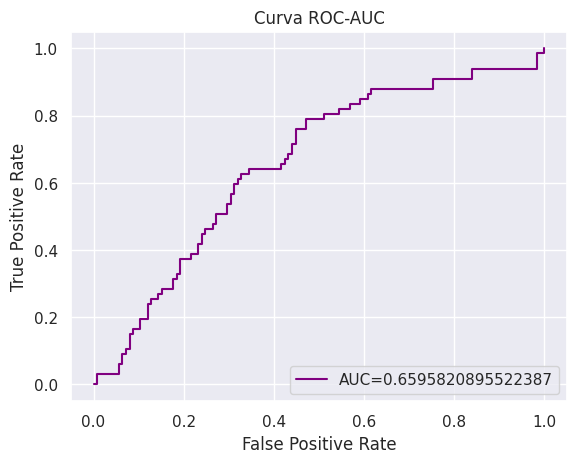

In [ ]:
from matplotlib.font_manager import MSFontDirectories
# Ploteamos la curva ROC (Receiver Operating Characteristic)
y_pred_proba = model_naive.predict_proba(Xtest)[::,1]
fpr, tpr, _ = ms.roc_curve(ytest,  y_pred_proba)
auc = ms.roc_auc_score(ytest, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,c='purple',label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("Curva ROC-AUC");

## 8. Entrenamos el modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
model_random = make_pipeline(MinMaxScaler(),RandomForestClassifier())
model_random.fit(Xtrain,ytrain)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

## 9. Evaluamos el modelo Random Forest

In [ ]:
print(f"R2 en entrenamiento: {model_random.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_random.score(Xtest,ytest)}")

R2 en entrenamiento: 1.0
R2 en testeo: 0.75


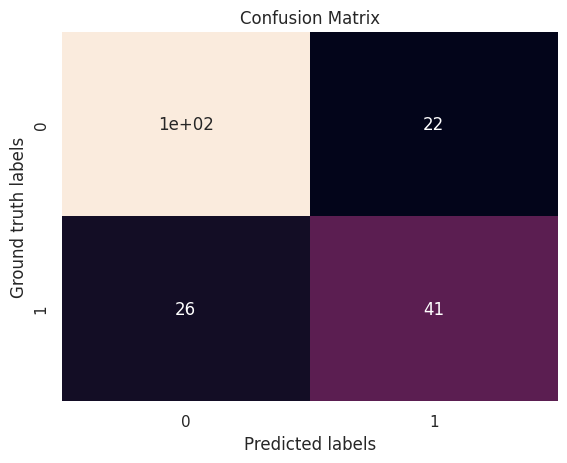

In [ ]:
y_pred_random = model_random.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_random)
sns.heatmap(confusion_matrix,annot=True,cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [ ]:
# Calculamos las metricas más usuales para controlar la performance del modelo
# Estas metricas son: Accuracy, Precision, Recall, F1-score
# Las almacenamos en un diccionario

acc_random = ms.accuracy_score(y_true = ytest, y_pred = y_pred_random)
precision_random = ms.precision_score(y_true = ytest, y_pred = y_pred_random)
recall_random = ms.recall_score(y_true = ytest, y_pred = y_pred_random)
f1_random = ms.f1_score(y_true = ytest, y_pred = y_pred_random)

random_metrics = {"Accuracy":acc_random,
                  "Precision":precision_random,
                  "Recall":recall_random,
                  "F1":f1_random}
random_metrics

{'Accuracy': 0.75,
 'Precision': 0.6507936507936508,
 'Recall': 0.6119402985074627,
 'F1': 0.6307692307692307}

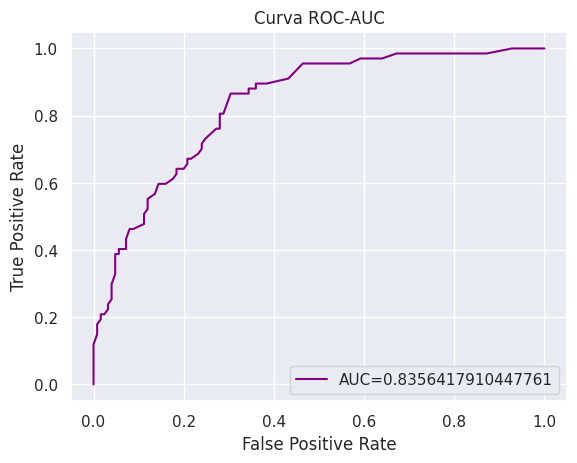

In [ ]:
from matplotlib.font_manager import MSFontDirectories
# Ploteamos la curva ROC (Receiver Operating Characteristic)
y_pred_proba = model_random.predict_proba(Xtest)[::,1]
fpr, tpr, _ = ms.roc_curve(ytest,  y_pred_proba)
auc = ms.roc_auc_score(ytest, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,c='purple',label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("Curva ROC-AUC");

## 10. Comparamos los tres modelos

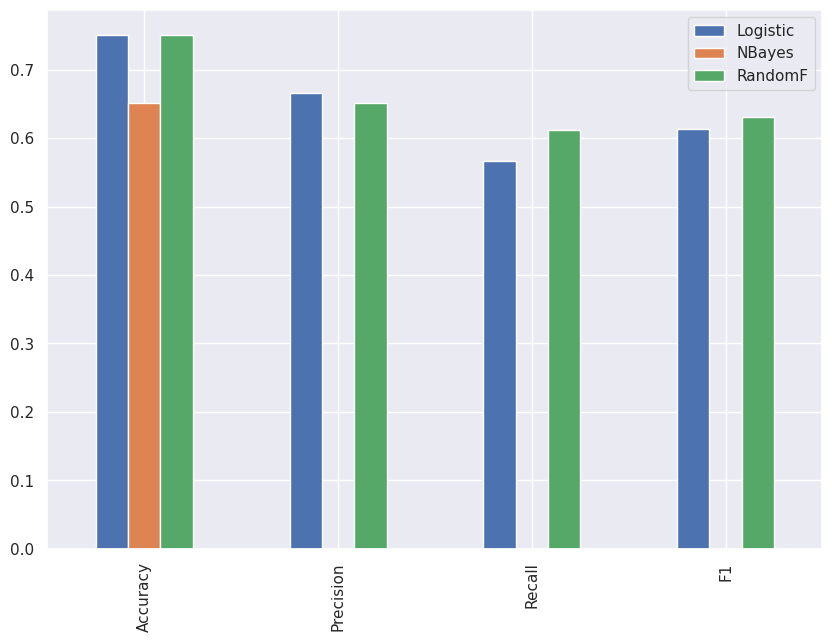

In [ ]:
import pandas as pd
pd.DataFrame({"Logistic":logreg_metrics,"NBayes":naive_metrics,"RandomF":random_metrics}).plot(kind='bar',figsize=(10,7));